In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
from lsst.utils import getPackageDir
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal, display
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

/Users/fred/lsst/code/meas_deblender/python/lsst/meas/deblender/utils.py:55: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  med = imsort[n/2]
INFO:lsst.meas.deblender.proximal:Total parents: 9
INFO:lsst.meas.deblender.proximal:Unblended sources: 4
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 5


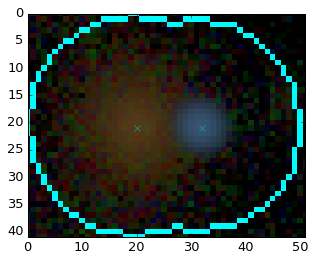

In [2]:
dataPath = os.path.abspath(os.path.join(lsst.utils.getPackageDir("testdata_deblender"), 'sim_data'))
filters = ["g", "r", "i", "z", 'y']
imgFilename = os.path.join(dataPath, "test1/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test1/det_merge.fits")
simFilename = os.path.join(dataPath, "test1/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
#display.plotColorImage(calexps=expDb.calexps, filterIndices=[2,1,0], contrast=1, figsize=(8,8));
condition = (expDb.mergedTable["peaks"]<=5) & (expDb.mergedTable["peaks"]>1)
#condition = (expDb.mergedTable["peaks"]>2) & (expDb.mergedTable["peaks"]<10)
footprint, peaks = expDb.getParentFootprint(parentIdx=0, condition=condition, contrast=1)
deblend = proximal.DeblendedParent(expDb, footprint, peaks)

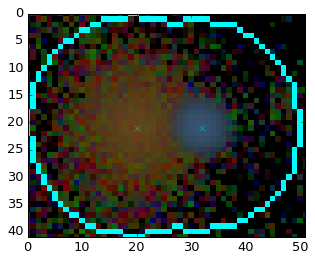

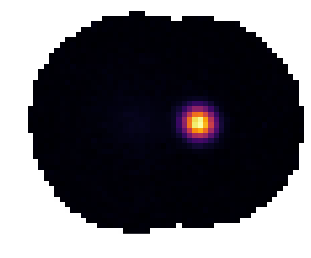

INFO:lsst.meas.deblender.proximal:constraints: MS
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Shape: (42, 52)
INFO:lsst.meas.deblender.proximal_nmf:Norm2: [ 53.53997181  66.09084657]
INFO:lsst.meas.deblender.proximal_nmf:Beginning Loop
INFO:lsst.meas.deblender.proximal_nmf:499 iterations
INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -3.218717575073242 to 138.0133819580078
INFO:lsst.meas.deblender.proximal:Max difference: 22.32733926277301
INFO:lsst.meas.deblender.proximal:Residual difference 9.9%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -3.218717575073242 to 138.0133819580078
INFO:lsst.meas.deblender.proximal:M

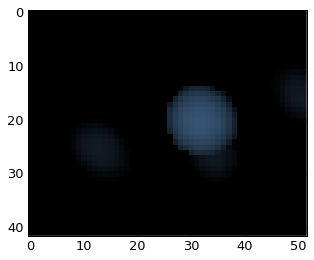

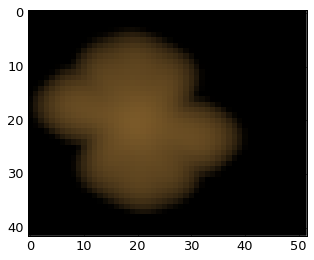

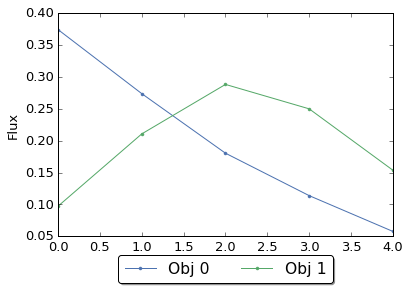

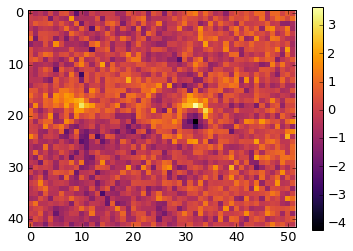

CPU times: user 7.32 s, sys: 150 ms, total: 7.47 s
Wall time: 7.48 s


In [3]:
peakCoords = [
    (146.739252207+.5,60.6299536683),
    (134.981830307+.5,60.6723839165)
]
%time glmm = expDb.deblendParent(condition=condition, parentIdx=0, display=True, maxiter=500, constraints='MS', usePsf=True, psfThresh=3e-3, l0_thresh=.5, e_rel=1e-2, peakCoords=peakCoords)

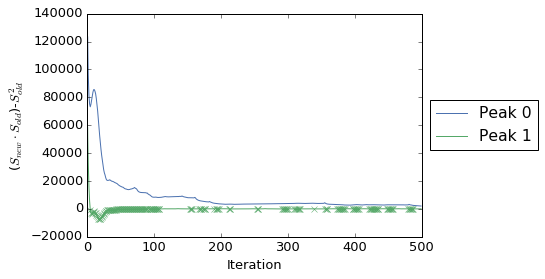

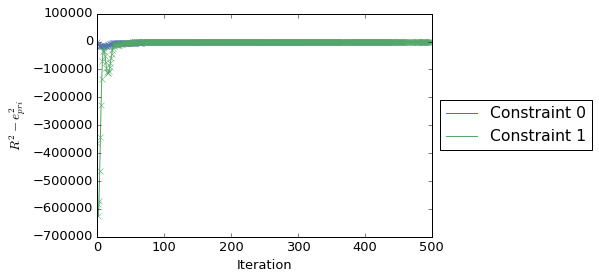

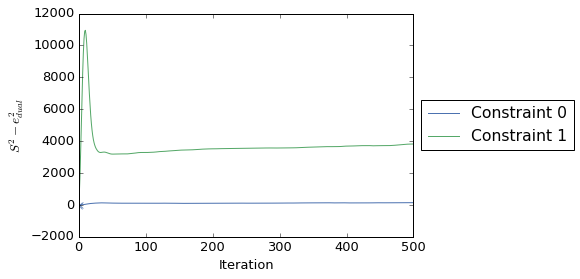

In [4]:
glmm.convergencePlots()

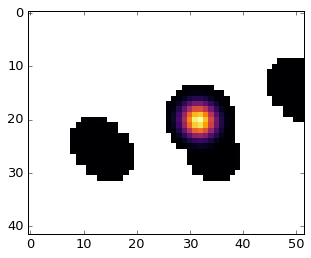

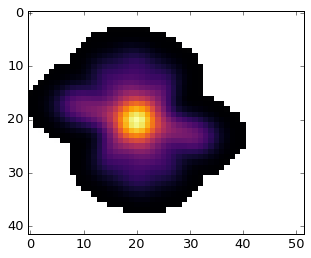

In [5]:
glmm.displayAllImages(0)

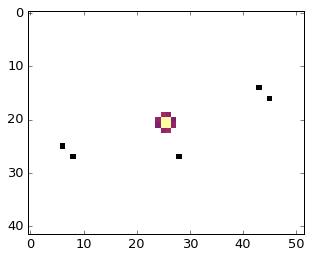

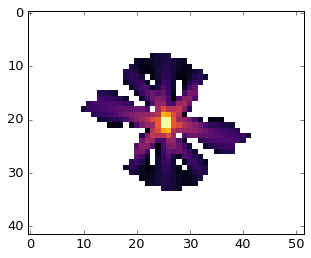

In [6]:
glmm.displayAllImages(imgType='intensity')

5.5631


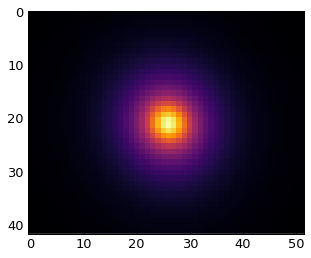

In [7]:
img = glmm.expDeblend.simTable[72]["intensity_g"]
w1 = int(np.sqrt(img.size))
img = img.reshape(w1,w1)

py, px = np.unravel_index(np.argmax(img), (w1,w1))
w = glmm.shape[1]>>1
h = glmm.shape[0]>>1

xmin = np.max([0, px-w])
xmax = np.min([w1, px+w])
ymin = np.max([0, py-h])
ymax = np.min([w1, py+h])

img = img[ymin:ymax, xmin:xmax]

print(np.max(img))

plt.imshow(img)